<a href="https://colab.research.google.com/github/harnalashok/LLMs/blob/main/LLMs_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 14/04/2024

## Self-supervised learning
Refer [here](https://lilianweng.github.io/posts/2019-11-10-self-supervised/)

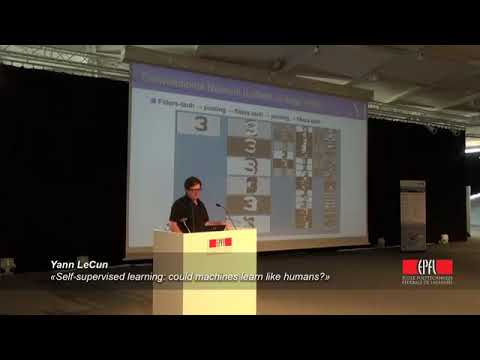

In [ ]:
# Here is a youtube video. See in colab:
# Talk of Yann LeCun

from IPython.display import YouTubeVideo
YouTubeVideo('7I0Qt7GALVk')

Given a task and enough labels, supervised learning can solve it really well. Good performance usually requires a decent amount of labels, but collecting manual labels is expensive (i.e. ImageNet) and hard to be scaled up. Considering the amount of unlabelled data (e.g. free text, all the images on the Internet) is substantially more than a limited number of human curated labelled datasets, it is kinda wasteful not to use them. However, unsupervised learning is not easy and usually works much less efficiently than supervised learning.

What if we can get labels for free for unlabelled data and train unsupervised dataset in a supervised manner? We can achieve this by framing a supervised learning task in a special form to predict only a subset of information using the rest. In this way, all the information needed, both inputs and labels, has been provided. This is known as self-supervised learning.

This idea has been widely used in language modeling. The default task for a language model is to predict the next word given the past sequence. BERT adds two other auxiliary tasks and both rely on self-generated labels.

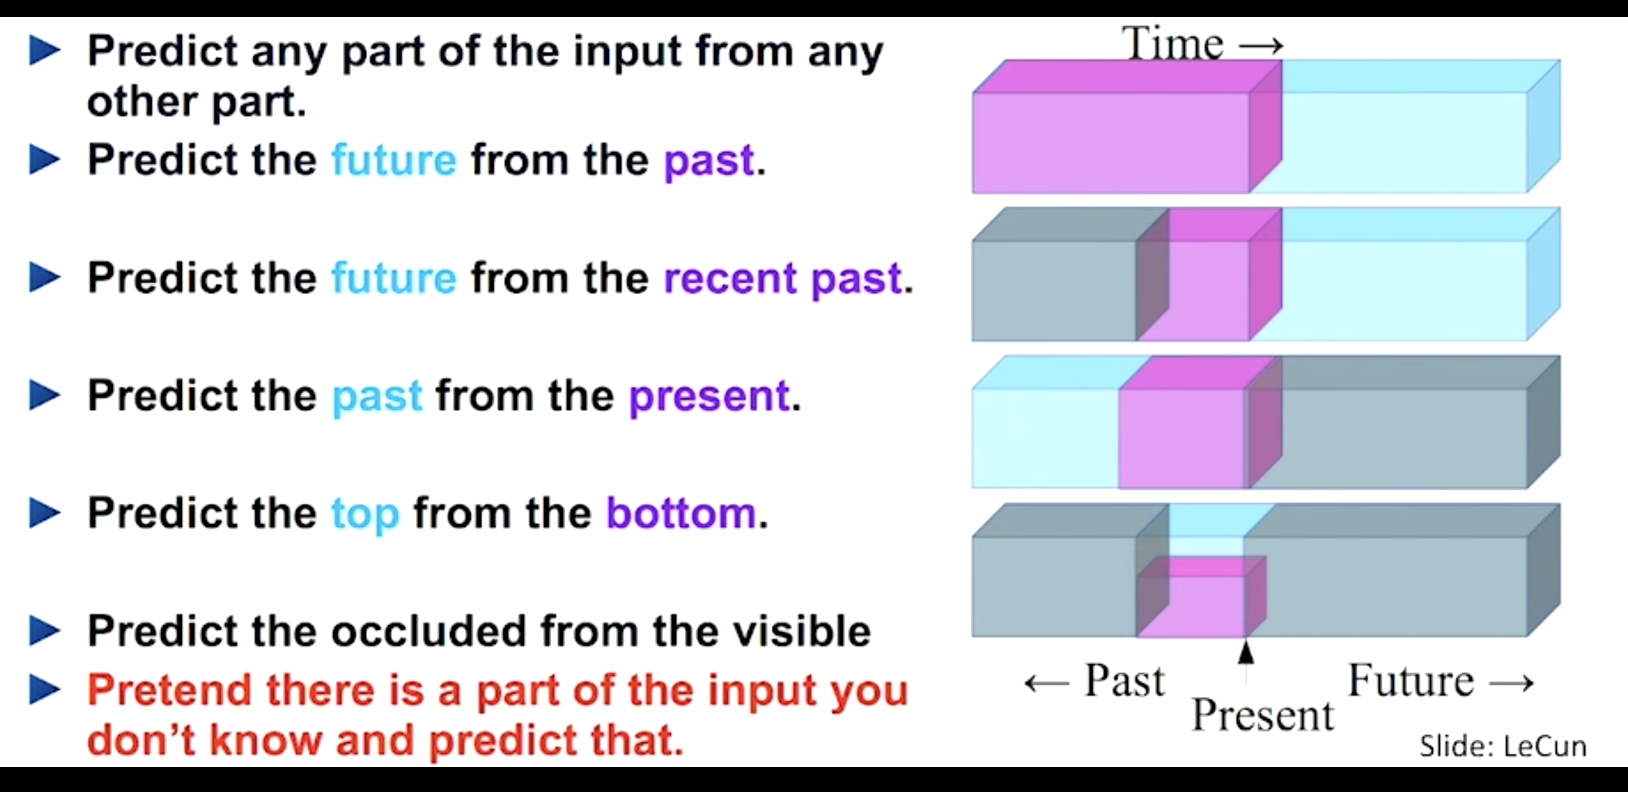

## Why self-supervised learning

Self-supervised learning empowers us to exploit a variety of labels that come with the data for free. The motivation is quite straightforward. Producing a dataset with clean labels is expensive but unlabeled data is being generated all the time. To make use of this much larger amount of unlabeled data, one way is to set the learning objectives properly so as to get supervision from the data itself.

The self-supervised task, also known as pretext task, guides us to a supervised loss function. However, we usually don’t care about the final performance of this invented task. Rather we are interested in the learned intermediate representation with the expectation that this representation can carry good semantic or structural meanings and can be beneficial to a variety of practical downstream tasks.

For example, we might rotate images at random and train a model to predict how each input image is rotated. The rotation prediction task is made-up, so the actual accuracy is unimportant, like how we treat auxiliary tasks. But we expect the model to learn high-quality latent variables for real-world tasks, such as constructing an object recognition classifier with very few labeled samples.

Broadly speaking, all the generative models can be considered as self-supervised, but with different goals: Generative models focus on creating diverse and realistic images, while self-supervised representation learning care about producing good features generally helpful for many tasks.

### Distortion

We expect small distortion on an image does not modify its original semantic meaning or geometric forms. Slightly distorted images are considered the same as original and thus the learned features are expected to be invariant to distortion.

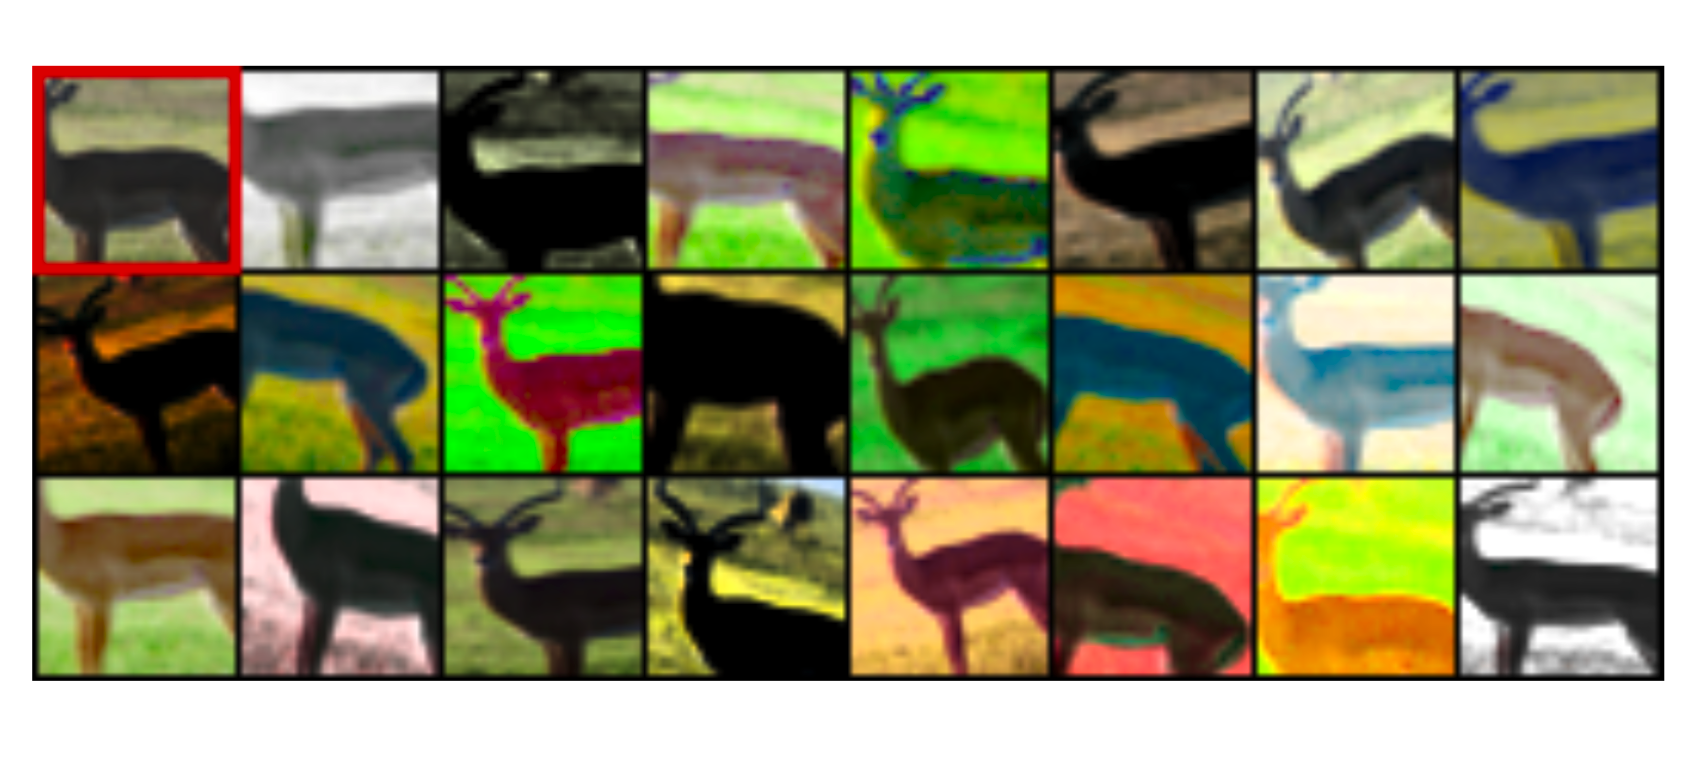

<i>Above: The original patch of a cute deer is in the top left corner. Random transformations are applied, resulting in a variety of distorted patches. All of them should be classified into the same class in the pretext task.</i>

### Rotation

Rotation of an entire image (Gidaris et al. 2018 is another interesting and cheap way to modify an input image while the semantic content stays unchanged. Each input image is first rotated by a multiple of at random, corresponding to [0,90,180,270] degrees. The model is trained to predict which rotation has been applied, thus a 4-class classification problem.

In order to identify the same image with different rotations, the model has to learn to recognize high level object parts, such as heads, noses, and eyes, and the relative positions of these parts, rather than local patterns. This pretext task drives the model to learn semantic concepts of objects in this way.

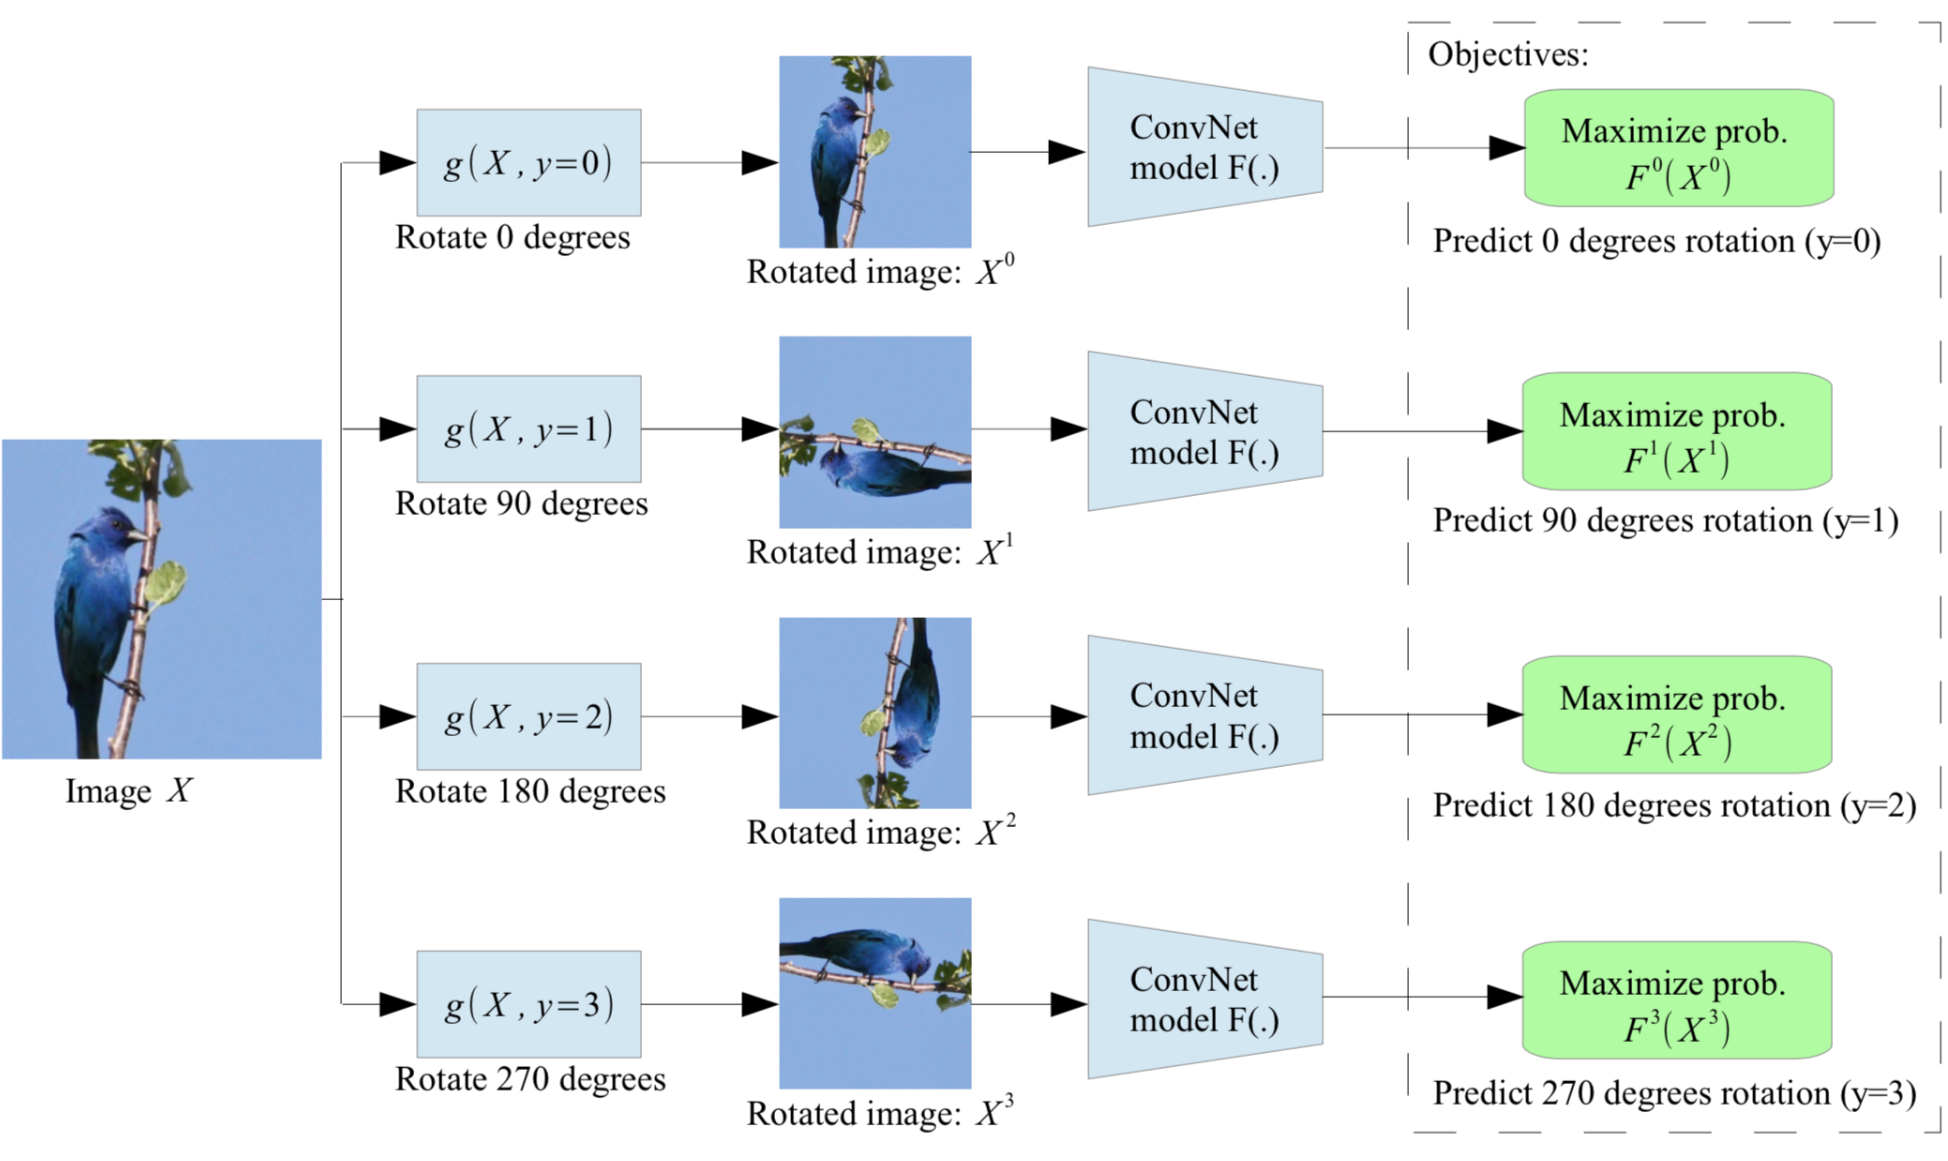

### Patches

The second category of self-supervised learning tasks extract multiple patches from one image and ask the model to predict the relationship between these patches.

Doersch et al. (2015) formulates the pretext task as predicting the relative position between two random patches from one image. A model needs to understand the spatial context of objects in order to tell the relative position between parts.



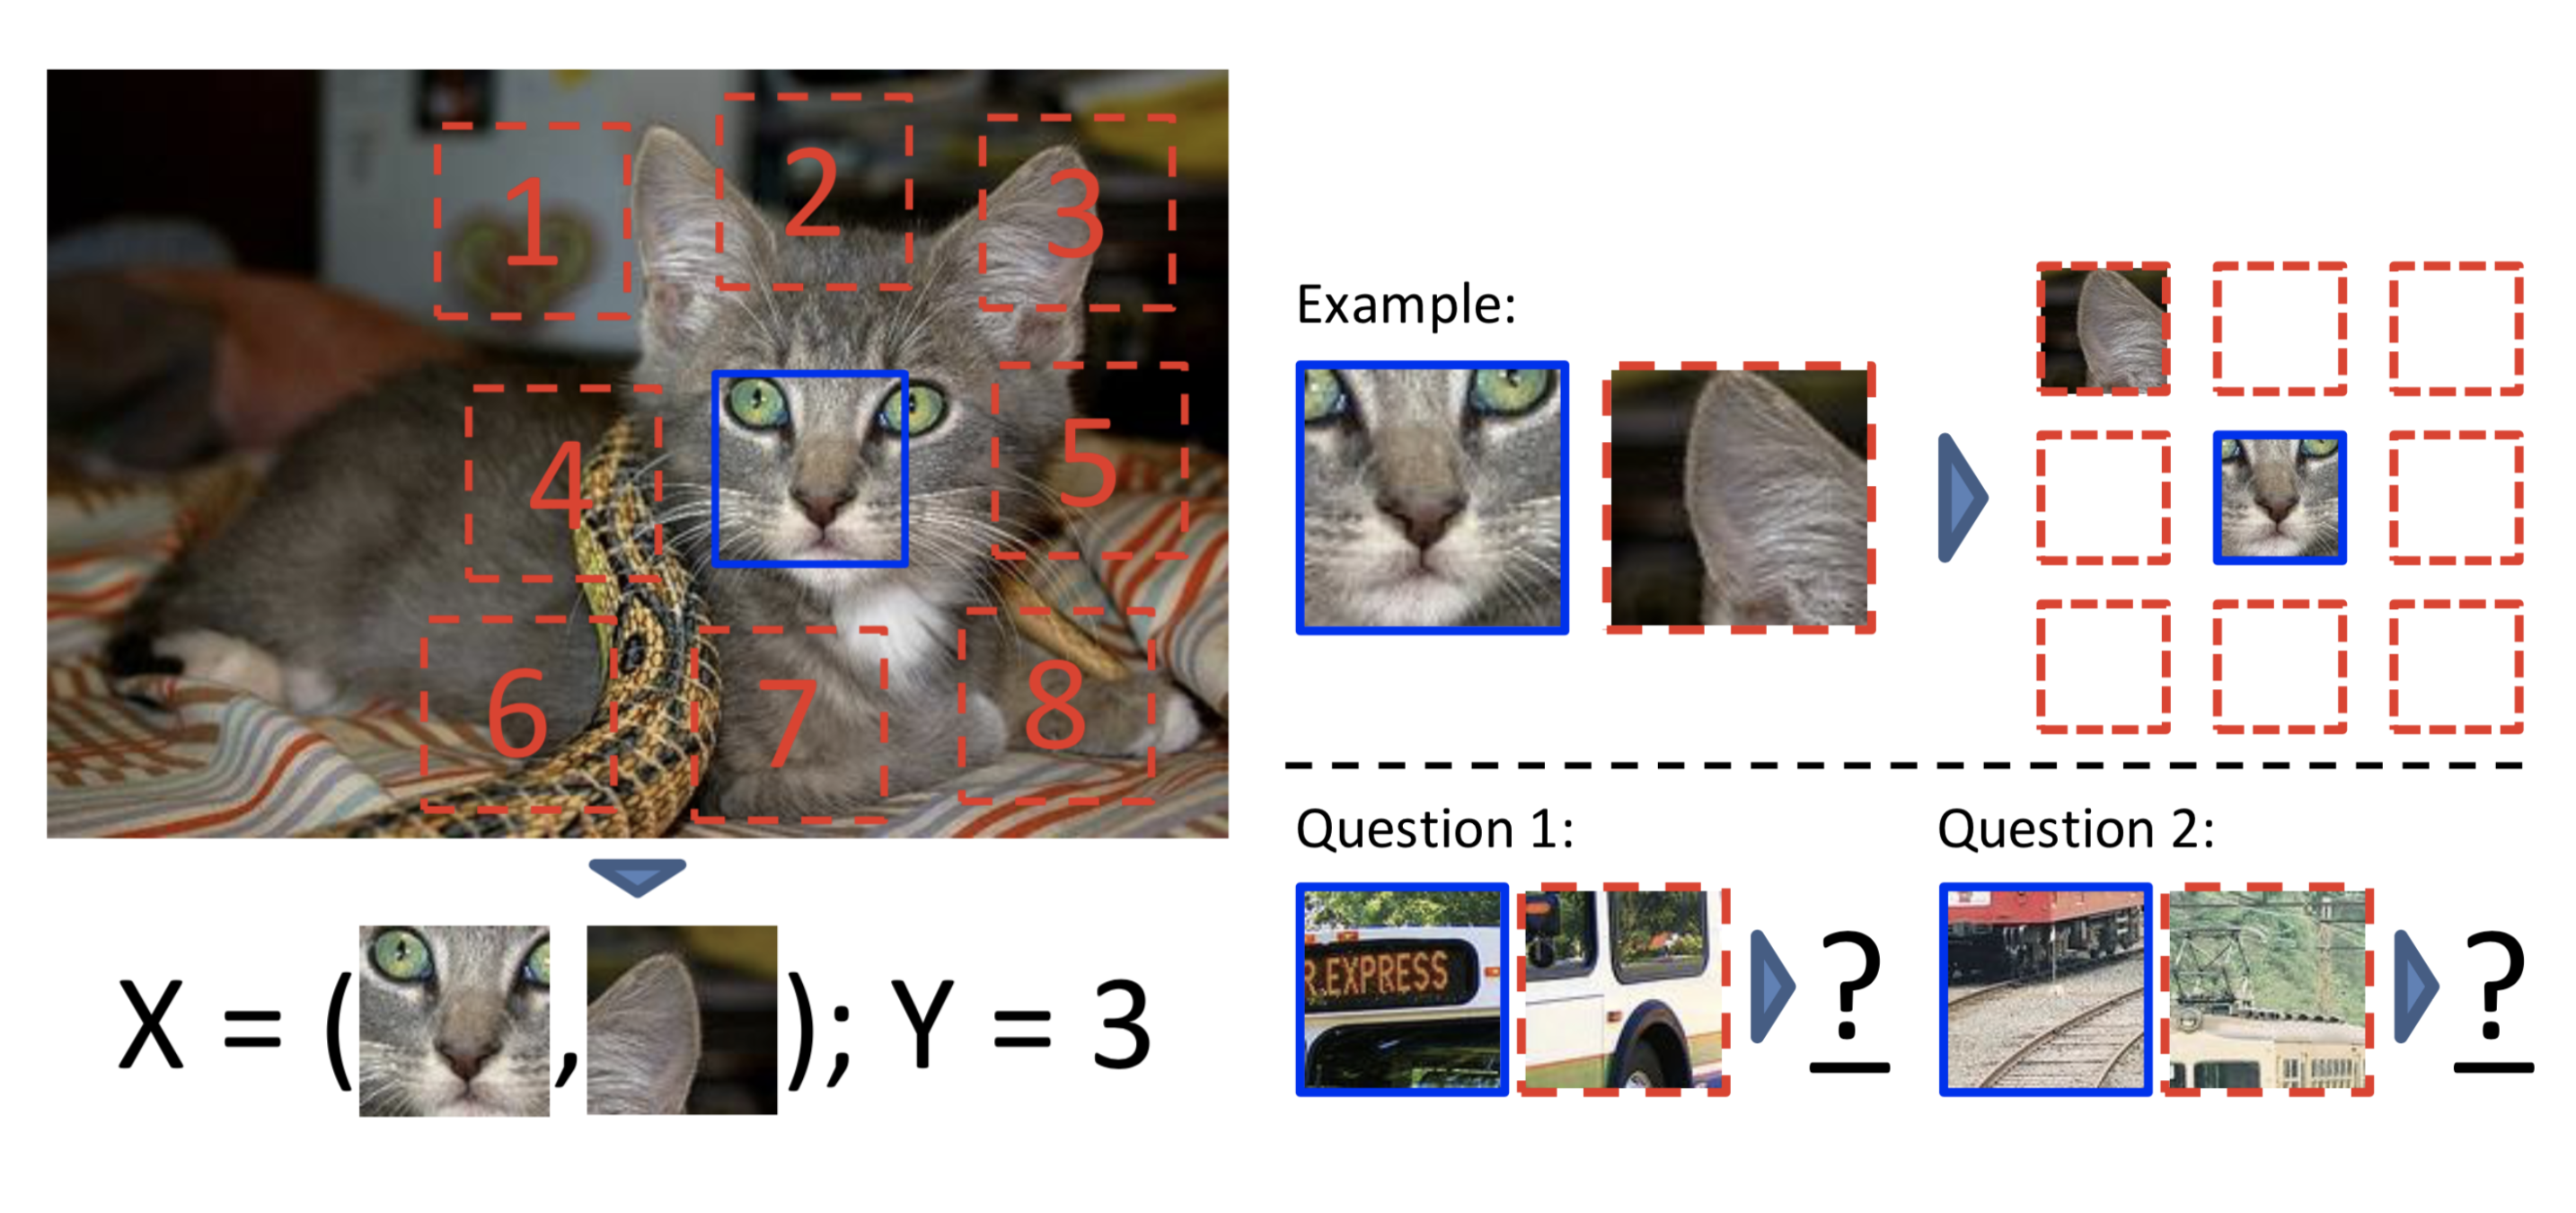

<i>Above: Illustration of self-supervised learning by predicting the relative position of two random patches.</i>

For more examples, see this [blog](https://lilianweng.github.io/posts/2019-11-10-self-supervised/).

## langchain
See from AWS [here](https://aws.amazon.com/what-is/langchain/)

>LangChain is an open source framework for building applications based on large language models (LLMs). LLMs are large deep-learning models pre-trained on large amounts of data that can generate responses to user queries—for example, answering questions or creating images from text-based prompts. LangChain provides tools and abstractions to improve the customization, accuracy, and relevancy of the information the models generate. For example, developers can use LangChain components to build new prompt chains or customize existing templates. LangChain also includes components that allow LLMs to access new data sets without retraining.

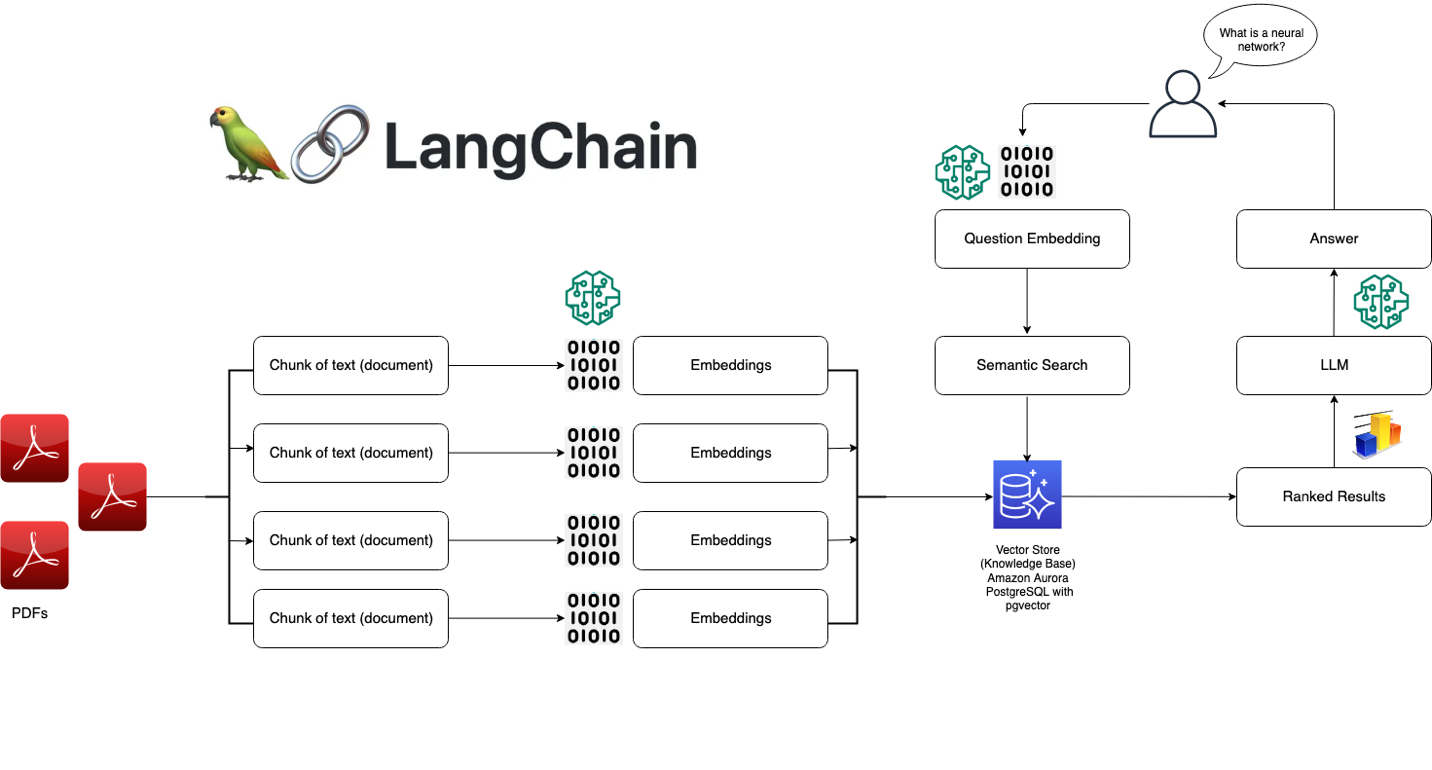